<a href="https://colab.research.google.com/github/yogeshgujjar/hero-no-1/blob/main/Stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/infolimpioavanzadoTarget.csv")
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [13]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(method='ffill').fillna(method='bfill')  # time series safe


<ipython-input-13-687284412>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')  # time series safe


In [14]:
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=constant_cols, inplace=True)


In [15]:
important_keywords = ['close', 'volume', 'RSI', 'MACD', 'ema', 'sma', 'lag']
important_cols = [col for col in df.columns if any(k in col.lower() for k in important_keywords)]

# Drop hammer patterns for now (they're hundreds)
important_cols = [col for col in important_cols if not col.startswith('hammer')]

# Include 'TARGET'
important_cols += ['TARGET']
df = df[important_cols]


In [16]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['TARGET'])
y = df['TARGET']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)  # You can tune this later
X_pca = pca.fit_transform(X_scaled)


In [18]:
df.head()

,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,RSIadjclose50,RSIvolume50,MACDadjclose15,...,fuerzarelativaE-lag5-clip,fuerzarelativaE-lag10-clip,fuerzarelativaF-lag0,fuerzarelativaF-lag0-clip,fuerzarelativaF-lag1-clip,fuerzarelativaF-lag2-clip,fuerzarelativaF-lag5-clip,fuerzarelativaF-lag10-clip,volumenrelativo,TARGET
0,17.760000,17.760000,106600,11.00338,57.100383,40.647232,50.807308,47.377558,56.095036,-0.314072,...,0.872125,0.18467,-0.147158,-0.147158,-0.030517,-2.094530,-0.0,-0.0,0.919758,0.0
1,17.660000,17.660000,128700,11.00338,57.100383,40.647232,50.807308,47.377558,56.095036,-0.314072,...,0.872125,0.18467,-0.177674,-0.177674,-0.030517,-2.094530,-0.0,-0.0,1.110440,0.0
2,16.950001,16.950001,103100,11.00338,57.100383,40.647232,50.807308,47.377558,56.095036,-0.314072,...,0.872125,0.18467,-2.241688,-2.241688,-2.064014,-2.094530,-0.0,-0.0,0.889560,0.0
3,16.170000,16.170000,173600,11.00338,57.100383,40.647232,50.807308,47.377558,56.095036,-0.314072,...,0.872125,0.18467,-2.875856,-2.875856,-0.634168,-2.698181,-0.0,-0.0,1.497843,0.0
4,15.710000,15.710000,137800,11.00338,57.100383,40.647232,50.807308,47.377558,56.095036,-0.314072,...,0.872125,0.18467,-2.425467,-2.425467,-0.000000,-0.183779,-0.0,-0.0,1.188956,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4164 entries, 0 to 4163
Columns: 153 entries, close to TARGET
dtypes: float64(152), int64(1)
memory usage: 4.9 MB


In [7]:
df.dtypes.value_counts()


,count
float64,1281
object,2
int64,2


In [8]:
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=constant_cols, inplace=True)


<Axes: >

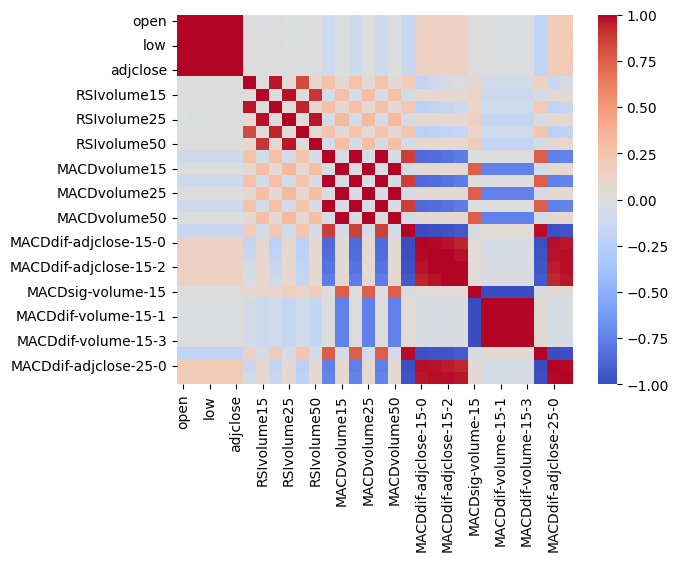

In [9]:
sample_cols = df.select_dtypes(include=['float64']).columns[:30]  # pick top 30
sns.heatmap(df[sample_cols].corr(), cmap='coolwarm', center=0)


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       671
         1.0       0.23      0.22      0.22       162

    accuracy                           0.70       833
   macro avg       0.52      0.52      0.52       833
weighted avg       0.70      0.70      0.70       833



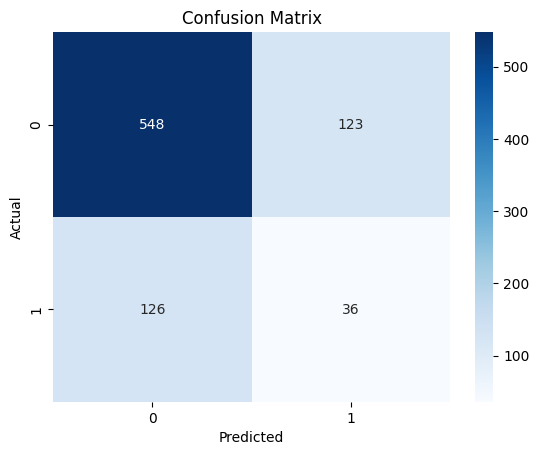

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


RandomForest Accuracy: 0.7011
LogisticRegression Accuracy: 0.7047
SVM Accuracy: 0.8055


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:52:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6567


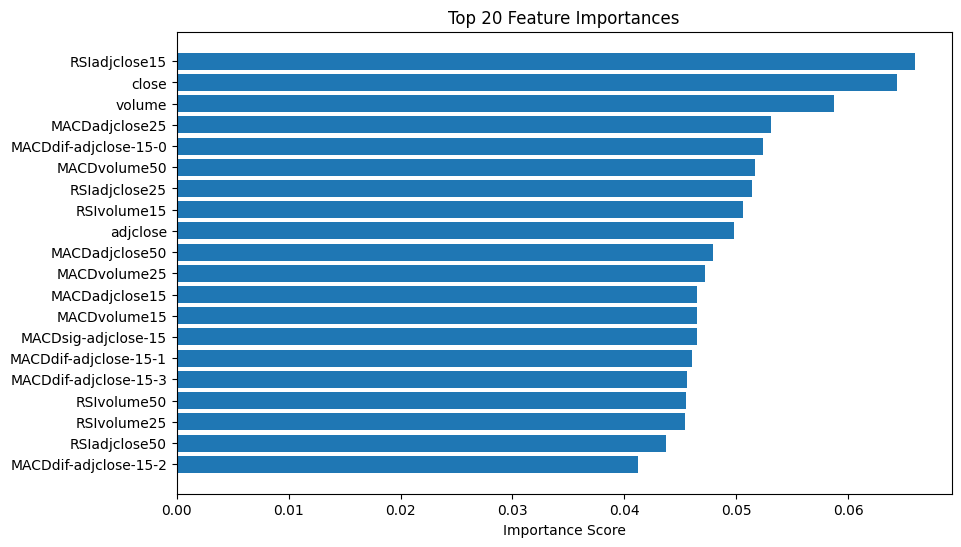

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# If you're not using PCA
# feature_importances = model.feature_importances_

# If you're using PCA, this is not directly available

# Without PCA, use this:
importances = model.feature_importances_
feat_names = X.columns[:len(importances)]
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


In [27]:
import joblib
joblib.dump(model, "stock_predictor.pkl")


['stock_predictor.pkl']

In [28]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [29]:
# streamlit_app.py
import streamlit as st
import joblib
import numpy as np

st.title("📈 Stock Movement Predictor")
model = joblib.load("stock_predictor.pkl")

user_input = st.text_input("Enter 20 PCA values (comma-separated):")
if user_input:
    input_array = np.array(user_input.split(","), dtype=float).reshape(1, -1)
    prediction = model.predict(input_array)
    st.write("📊 Prediction:", "📈 UP" if prediction[0] == 1 else "📉 DOWN")


2025-06-14 07:53:33.844 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 07:53:34.141 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-14 07:53:34.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 07:53:34.297 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 07:53:34.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 07:53:34.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 07:53:34.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 07:53:34.313 Session state does not 

In [31]:
!pip install streamlit pyngrok --quiet


In [32]:
import joblib
joblib.dump(model, "stock_predictor.pkl")


['stock_predictor.pkl']

In [33]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

st.set_page_config(page_title="Stock Predictor", layout="centered")
st.title("📈 Stock Movement Predictor (PCA-based)")

# Load trained model
model = joblib.load("stock_predictor.pkl")

st.write("Enter your 20 PCA features below (comma-separated):")
user_input = st.text_area("PCA Input", placeholder="e.g. 0.12, -0.03, ... up to 20 numbers")

if st.button("Predict"):
    try:
        values = np.array([float(x.strip()) for x in user_input.split(",")]).reshape(1, -1)
        if values.shape[1] != 20:
            st.error("❌ Please enter exactly 20 values.")
        else:
            prediction = model.predict(values)
            st.success(f"📊 Prediction: {'📈 UP' if prediction[0] == 1 else '📉 DOWN'}")
    except:
        st.error("⚠️ Invalid input. Please enter 20 comma-separated numbers.")


Writing app.py


In [35]:
from pyngrok import conf

conf.get_default().auth_token = "2xvkDw4KA1r5DD19X6PXULAf0qS_2Y89JiCCTHCnPdtm64rzf"


In [37]:
from pyngrok import conf, ngrok
import time

# Set your ngrok authtoken first
conf.get_default().auth_token = "2xvkDw4KA1r5DD19X6PXULAf0qS_2Y89JiCCTHCnPdtm64rzf"  # 👈 Replace with your real token

# Start Streamlit app
!streamlit run app.py &>/content/log.txt &
time.sleep(3)

# Create an http tunnel to localhost:8501
public_url = ngrok.connect("http://localhost:8501", "http")
print(f"✅ Your app is live at: {public_url}")


✅ Your app is live at: NgrokTunnel: "https://6baf-34-136-108-251.ngrok-free.app" -> "http://localhost:8501"
